In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
sns.set()
%matplotlib inline

# Importazione dataset.

In [2]:
df = pd.read_csv("heart_data.csv")
df.drop('id', axis = 1, inplace = True)

# Visualizzazione dati.

In [3]:
df.head()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.tail()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df.shape #visualizziamo quante righe e colonne abbiamo

(70000, 13)

In [6]:
#controlliamo se ci sono righe duplicate
df.duplicated().sum()

0

In [7]:
#controlliamo se ci sono valori nulli
df.isnull().sum()

index          0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
#verifichiamo che esistano solo i due valori binari 0 ed 1 che rappresentano rispettivamente: assenza o presenza di malattie cardiovascolari
df['cardio'].unique()

array([0, 1])

# Data pre-processing

In [3]:
# Convertiamo da giorni ad anni
ab=[]
for x in df["age"]:
    x1=x//365
    ab.append(x1)
df.insert(1,"Age",ab)
df.drop('age', axis = 1, inplace = True)
df.head()

,index,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
df.describe().T[1:]    #escludendo la conlonna dell'index andiamo ad ottenere vari dettagli sul nostro dataset

,count,mean,std,min,25%,50%,75%,max
Age,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


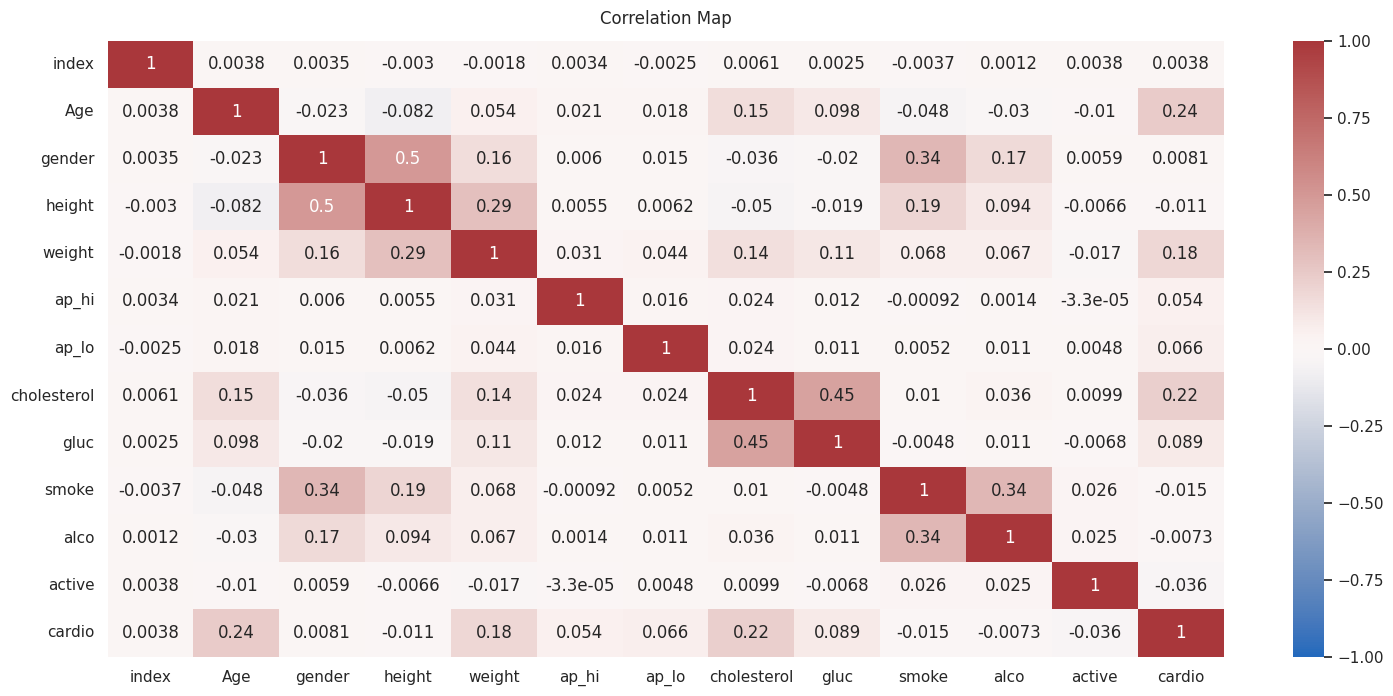

In [11]:
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

# Observations from the statistics description:

minumum age recorded is 30 years old

height(cm) and weight(kg) are objective features

height - min: 55cm

weight - min: 10kg

ap_hi and ap_lo are examination features and both recorded extremes values

ap_hi - min:-150 and max:16020

ap_low - min:-70 and max:11000

## Cerchiamo qualora ci fossero degli outliers:

Tracciamo degli istogrammi per dare una controllata veloce

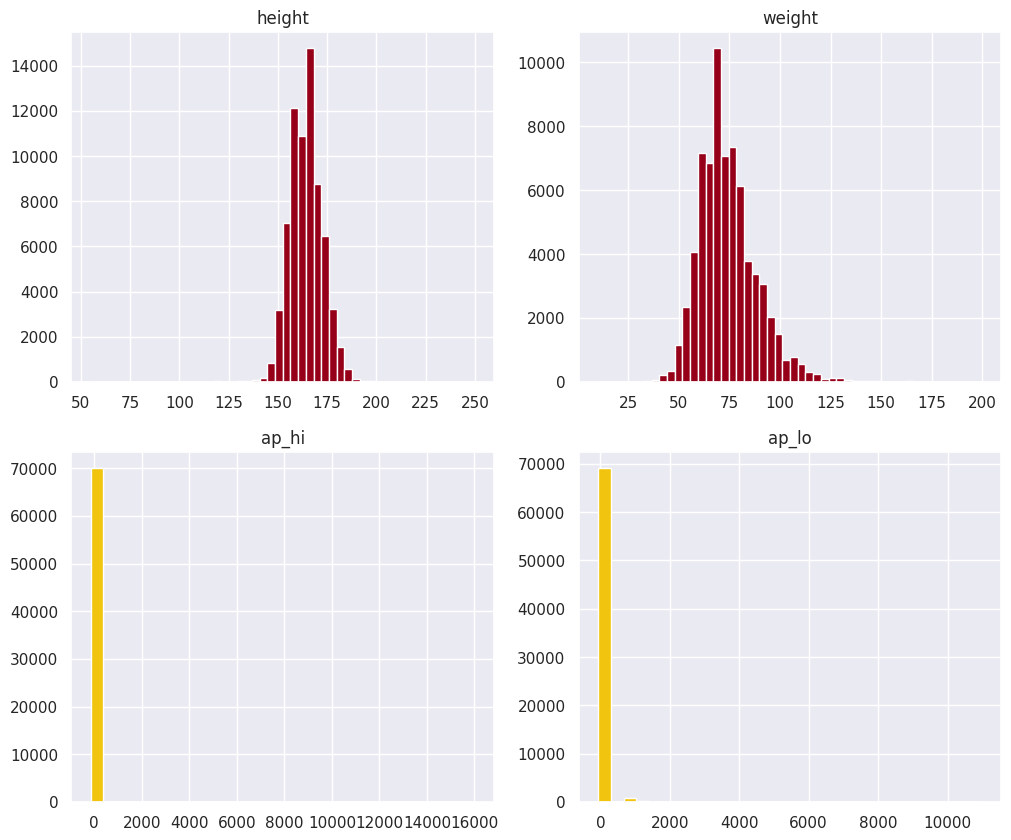

In [12]:
#Per tracciare gli istogrammi usiamo delle funzioni dalla library matplotlib
import matplotlib.pyplot as plt



plt.figure(figsize=(12,10))

colors = ['#960018', '#F1C40F'] # bordeaux e giallo oro della Roma

plt.subplot(221)
plt.hist(df['height'], bins=50, color=colors[0])
plt.title('height')

plt.subplot(222)
plt.hist(df['weight'], bins=50, color=colors[0])
plt.title('weight')

plt.subplot(223)
plt.hist(df['ap_hi'], bins=30, color=colors[1])
plt.title('ap_hi')

plt.subplot(224)
plt.hist(df['ap_lo'], bins=30, color=colors[1])
plt.title('ap_lo')

plt.show()


# the extreme values in column ap_hi and ap_lo affected the range of x in historgrams

il codice crea una figura con 4 sottografici (subplot) con un numero di barre specificato (50 per altezza e peso e 30 per ap_hi e ap_lo). Ciascun sottografico presenta un titolo che indica la variabile rappresentata. Infine, il grafico viene visualizzato.

In [4]:
# Rinominiamo le colonne per avere una chiara descrizione del contenuto del dataset
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular disease', 'Age':'age'}, inplace=True)

In [14]:
df.head()

,index,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


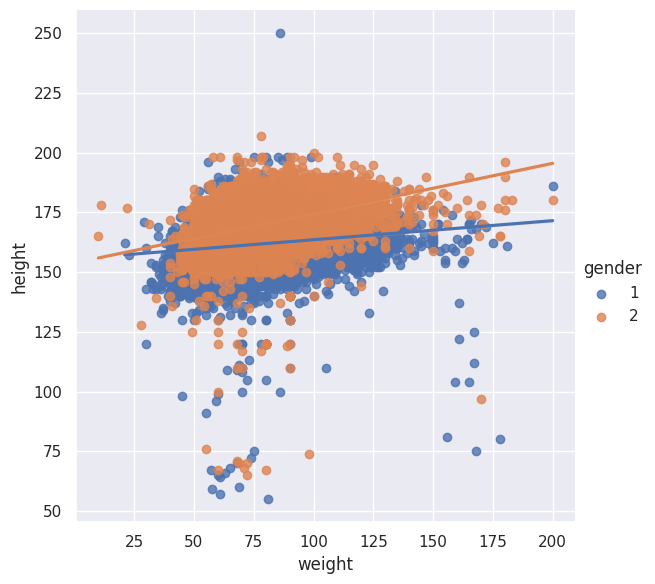

In [15]:
#Per verificare più nel dettaglio gli outliers di weight ed height nel nostro dataset usiamo una funzione dalla library di seaborn
sns.lmplot(x='weight', y='height', hue='gender', data=df, fit_reg=True, height=6)
plt.show()

### Data Cleaning

In [5]:
# to remove values more than 1.5 times the Inter Quartile Range (IQR) variable values
def outliers_iqr(ys):
    quartile1, quartile3 = np.percentile(ys, [25,75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr*1.5)
    upper_bound = quartile3 + (iqr*1.5)
    
    print(f'Q1:{quartile1}, Q3:{quartile3}, IQR:{iqr}')
    print(f'Lower Bound:{lower_bound}, Upper Bound:{upper_bound}')
    
    result = np.where((ys > upper_bound) | (ys < lower_bound))
    boundary = (lower_bound, upper_bound)
    
    print(f'Number of outliers: {len(result[0])}')
    
    return result, boundary

Il codice definisce una funzione chiamata "outliers_iqr" che prende in input una serie di dati numerici "ys" e restituisce una tupla contenente un array con gli indici degli outlier e il valore di lower_bound e upper_bound, ovvero il limite inferiore e superiore dell'intervallo che definisce gli outlier.

All'interno della funzione, la variabile "quartile1" rappresenta il primo quartile, "quartile3" rappresenta il terzo quartile e "iqr" rappresenta l'Inter Quartile Range (IQR), calcolato come la differenza tra il terzo e il primo quartile.

Successivamente, viene calcolato il limite inferiore e superiore come quartile1 - (iqr3) e quartile3 + (iqr3), rispettivamente, che corrispondono a 1.5 volte l'IQR.

Infine, vengono selezionati gli outlier utilizzando la funzione "np.where" che restituisce un array booleano indicando quali valori soddisfano la condizione specificata (ovvero che siano al di fuori degli intervalli definiti da lower_bound e upper_bound).

La funzione restituisce l'array di indici degli outlier e i limiti dell'intervallo degli outlier.

Nel resto del codice, viene utilizzata la funzione "outliers_iqr" per selezionare gli outlier della variabile "height" all'interno del dataframe "df". In particolare, gli indici degli outlier vengono salvati in una lista chiamata "height_outlier_index" e il dataframe contenente gli outlier viene salvato in "df_height_outlier".

Inoltre, la funzione "outliers_iqr" stampa a video la Q1, Q3 e l'IQR per la variabile di input, i limiti inferiore e superiore dell'intervallo degli outlier e il numero di outlier trovati. Nell'esempio specifico, ci sono 93 outlier nella variabile "height".



In [6]:
height_outlier_index = list(outliers_iqr(df['height'])[0][0])
df_height_outlier = df.iloc[height_outlier_index,:]
df_height_outlier

Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:142.5, Upper Bound:186.5
Number of outliers: 519


,index,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
62,62,55,2,187,115.0,130,90,1,1,0,1,1,0
76,76,55,2,188,105.0,120,80,1,1,0,0,1,1
224,224,59,2,76,55.0,120,80,1,1,0,0,1,0
249,249,49,1,142,61.0,120,80,1,1,0,0,1,0
781,781,63,1,141,60.0,120,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69430,69430,52,1,140,52.0,150,80,2,1,0,0,1,1
69475,69475,52,2,187,73.0,120,80,1,3,0,0,1,0
69589,69589,50,2,192,83.0,110,70,1,1,0,1,0,0
69784,69784,48,1,141,44.0,100,70,1,1,0,0,1,0


In [7]:
weight_outlier_index = list(outliers_iqr(df['weight'])[0][0])
df_weight_outlier = df.iloc[weight_outlier_index,:]
df_weight_outlier

Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:39.5, Upper Bound:107.5
Number of outliers: 1819


,index,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
15,15,45,2,172,112.0,120,80,1,1,0,0,0,1
62,62,55,2,187,115.0,130,90,1,1,0,1,1,0
83,83,53,1,152,110.0,160,90,1,1,0,0,1,1
196,196,62,1,176,108.0,140,90,1,1,0,0,0,0
267,267,47,1,165,115.0,150,100,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69873,69873,54,2,188,108.0,130,80,2,2,0,1,0,1
69946,69946,58,1,164,115.0,130,80,1,1,0,0,1,1
69947,69947,63,2,172,113.0,110,80,1,1,0,0,0,1
69981,69981,47,2,182,110.0,130,90,2,2,0,0,1,1


In [10]:
ap_hi_outlier_index = list(outliers_iqr(df['systolic'])[0][0])
df_aphi_outlier = df.iloc[ap_hi_outlier_index,:]
df_aphi_outlier

Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:90.0, Upper Bound:170.0
Number of outliers: 1435


,index,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
59,59,55,1,164,64.0,180,90,1,1,1,0,1,1
61,61,57,2,165,75.0,180,90,3,1,0,0,1,1
101,101,51,1,167,80.0,190,90,2,1,0,1,0,0
209,209,49,2,172,62.0,80,70,1,1,0,0,1,0
230,230,64,2,175,75.0,180,100,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69587,69587,63,1,169,101.0,180,110,1,1,0,0,0,1
69593,69593,45,2,179,93.0,180,100,1,2,0,1,1,1
69830,69830,61,2,163,67.0,180,100,2,1,0,0,0,1
69894,69894,46,1,160,70.0,200,100,1,2,0,0,1,1


In [8]:
ap_lo_outlier_index = list(outliers_iqr(df['diastolic'])[0][0])
df_aplo_outlier = df.iloc[ap_lo_outlier_index,:]
df_aplo_outlier


Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:65.0, Upper Bound:105.0
Number of outliers: 4632


,index,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
9,9,54,1,164,68.0,110,60,1,1,0,0,0,0
23,23,64,2,156,45.0,110,60,1,1,0,0,1,0
43,43,56,2,159,63.0,120,60,1,1,0,0,1,1
50,50,49,1,160,75.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69929,69929,54,1,164,85.0,165,110,3,3,0,0,1,1
69932,69932,41,2,171,67.0,110,60,1,1,0,0,1,0
69937,69937,39,1,160,53.0,90,60,1,1,0,0,1,0
69967,69967,58,2,168,63.0,140,1000,1,1,0,0,1,1


In [11]:
#Remove outliers
all_outlier_index = height_outlier_index + weight_outlier_index + ap_hi_outlier_index + ap_lo_outlier_index
all_outlier_index = list(set(all_outlier_index))
print(len(all_outlier_index))

7495


In [12]:
df_clean = df.drop(index = all_outlier_index).reset_index()
df_clean.drop(columns=['index','level_0'], inplace=True)
df_clean

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,60,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62500,53,1,172,70.0,130,90,1,1,0,0,1,1
62501,57,1,165,80.0,150,80,1,1,0,0,1,1
62502,52,2,168,76.0,120,80,1,1,1,0,1,0
62503,61,1,163,72.0,135,80,1,2,0,0,0,1


In [23]:
#visualizziamo gli effetti della nostra "pulitura"
for col in df_clean.columns:
    print(col)
    print(df_clean[col].value_counts())
    print('-')

age
55    3519
53    3414
57    3312
54    3271
56    3252
59    3215
58    3092
49    3021
51    2988
52    2946
60    2910
50    2894
63    2457
61    2431
62    1986
64    1970
47    1943
45    1827
43    1744
41    1669
48    1613
39    1522
46    1459
40    1426
44    1347
42    1274
29       2
30       1
Name: age, dtype: int64
-
gender
1    40718
2    21787
Name: gender, dtype: int64
-
height
165    5410
160    4534
170    4303
168    4067
164    3041
158    2997
162    2929
169    2591
156    2477
167    2294
163    2270
172    1830
159    1789
166    1771
175    1648
157    1622
155    1573
161    1526
174    1390
154    1252
171    1179
178    1096
152     990
176     987
173     942
153     931
150     930
180     755
151     546
177     390
179     370
149     298
148     272
182     265
185     197
147     192
181     159
145     137
146     132
183     127
184     119
186      79
144      61
143      37
Name: height, dtype: int64
-
weight
65.0    3604
70.0    3522
68.0   

In [13]:
df = df_clean

Il codice che segue utilizza la funzione countplot() della libreria Seaborn per creare un grafico a barre che mostra il numero di pazienti con e senza malattia cardiovascolare, suddivisi per genere.

In particolare, l'argomento x='gender' indica che la variabile "gender" del DataFrame df sarà utilizzata come variabile sull'asse x del grafico. L'argomento data=df indica che i dati utilizzati per il grafico sono contenuti nel DataFrame df. L'argomento hue='cardiovascular disease' indica che la variabile "cardiovascular disease" del DataFrame df sarà utilizzata per suddividere i dati in due gruppi distinti (con e senza malattia cardiovascolare), che saranno rappresentati con colori diversi all'interno del grafico.

L'output del grafico mostrerà due barre per ogni genere, una per i pazienti senza malattia cardiovascolare e una per i pazienti con malattia cardiovascolare. L'asse y del grafico rappresenterà il numero di pazienti in ciascun gruppo.

In [25]:
df.describe() 

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
count,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000
mean,52.907735,1.348564,164.406144,73.180776,126.419870,81.698904,1.357699,1.220638,0.086345,0.052172,0.804320,0.493880
std,6.743292,0.476519,7.531365,12.272097,14.289834,7.673364,0.675192,0.567590,0.280875,0.222375,0.396727,0.499967
min,29.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Note: Il nostro dataset adesso sembra più realistico

In [14]:
df_train = df

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62505 entries, 0 to 62504
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     62505 non-null  int64  
 1   gender                  62505 non-null  int64  
 2   height                  62505 non-null  int64  
 3   weight                  62505 non-null  float64
 4   systolic                62505 non-null  int64  
 5   diastolic               62505 non-null  int64  
 6   cholesterol             62505 non-null  int64  
 7   glucose                 62505 non-null  int64  
 8   smoke                   62505 non-null  int64  
 9   alcohol                 62505 non-null  int64  
 10  active                  62505 non-null  int64  
 11  cardiovascular disease  62505 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.7 MB


In [28]:

df_train.duplicated().sum()

3190

In [29]:
df_train[df_train.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
751,40,2,165,60.0,120,80,1,1,0,0,0,0
856,49,2,175,89.0,120,80,1,1,0,0,1,0
1665,58,1,165,78.0,120,80,1,1,0,0,1,1
1702,57,1,160,58.0,120,80,1,1,0,0,1,0
3476,42,2,169,65.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62415,48,1,164,68.0,120,80,1,1,0,0,1,0
62461,41,1,158,55.0,110,70,1,1,0,0,1,0
62490,53,1,165,72.0,120,80,1,1,0,0,1,0
62493,49,2,180,78.0,120,80,1,1,0,0,1,0


In [15]:
df_train.drop_duplicates(inplace=True)

In [31]:
df_train.count()

age                       59315
gender                    59315
height                    59315
weight                    59315
systolic                  59315
diastolic                 59315
cholesterol               59315
glucose                   59315
smoke                     59315
alcohol                   59315
active                    59315
cardiovascular disease    59315
dtype: int64

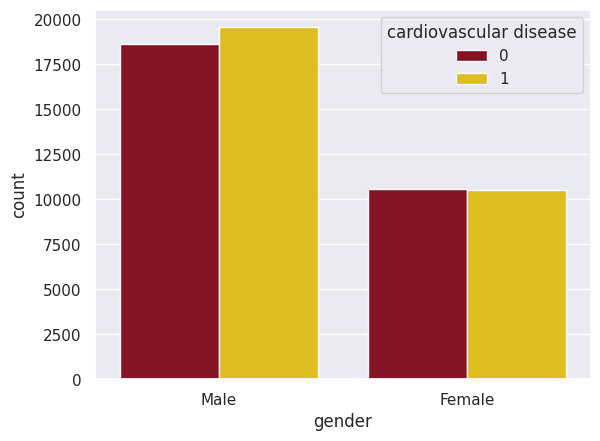

In [32]:
my_palette = {0:'#960018', 1:'#FFD200'}
sns.countplot(x='gender', hue='cardiovascular disease', data=df_train, palette = my_palette)
plt.xticks([0,1],['Male','Female'])
plt.show()
## Non sembra esserci differenza tra uomini e donne nella possibilità di sviluppare malattie cardiovascolari

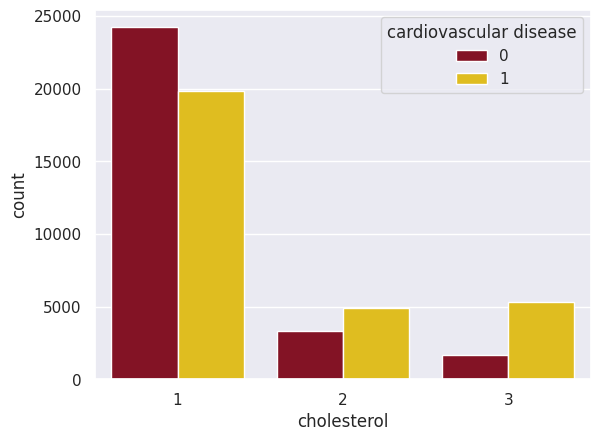

In [33]:
sns.countplot(x='cholesterol', hue='cardiovascular disease', data=df_train, palette =my_palette)
plt.show()
# There appears to be a correlation between higher cholesterol levels and cardiovascular disease
# chloesterol levels: 1 = normal, 2 = above normal, 3 = well above normal

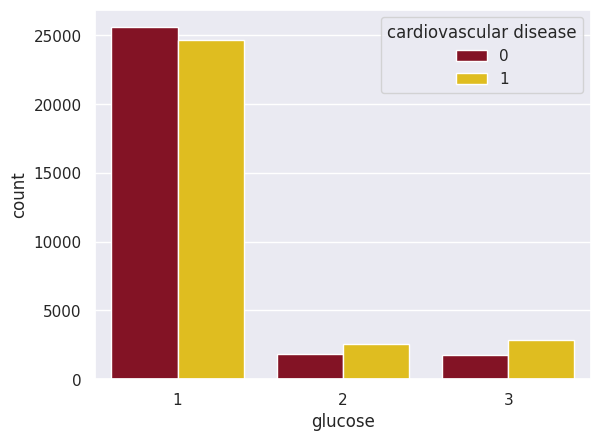

In [34]:
sns.countplot(x='glucose', hue='cardiovascular disease', data=df_train, palette = my_palette)
plt.show()
# There appears to be another correlation between higher glucose levels and cardiovascular disease
# glucose levels: 1 = normal, 2 = above normal, 3 = well above normal

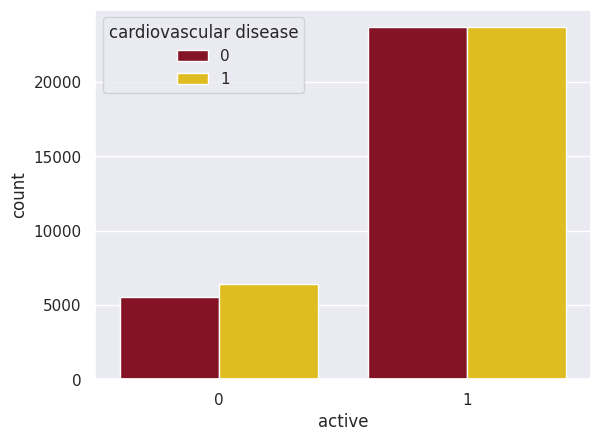

In [35]:
sns.countplot(x='active', hue='cardiovascular disease', data=df_train, palette = my_palette)
plt.show()

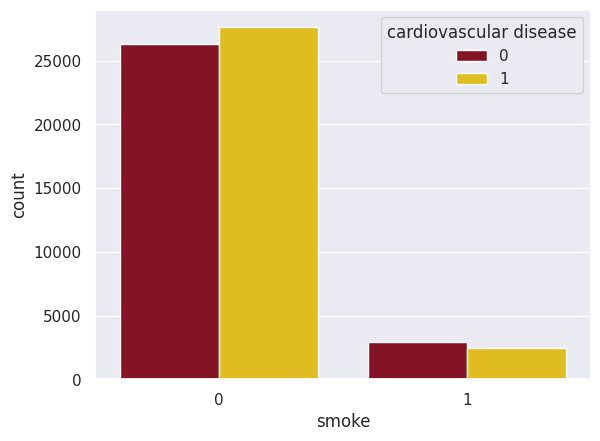

In [36]:
sns.countplot(x='smoke', hue='cardiovascular disease', data=df_train, palette = my_palette)
plt.show()

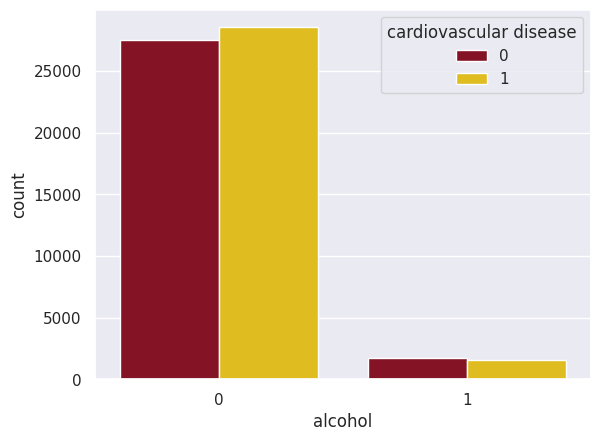

In [37]:

sns.countplot(x='alcohol', hue='cardiovascular disease', data=df_train, palette= my_palette)
plt.show()

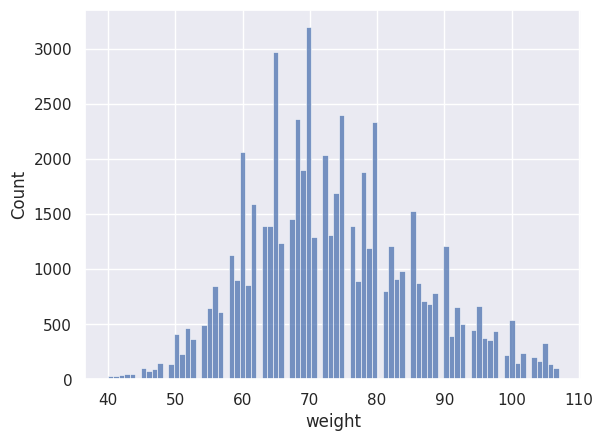

In [38]:

sns.histplot(data=df_train, x='weight')
plt.show()

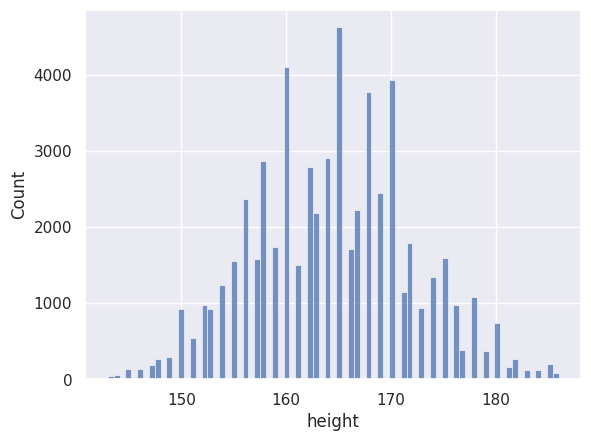

In [39]:
sns.histplot(data=df_train, x='height')
plt.show()

## Feature Engineering


Il "Feature Engineering" è una tecnica utilizzata nell'analisi dei dati per creare nuove variabili (chiamate "feature") che possano aiutare a migliorare le prestazioni dei modelli di machine learning.

Il Body Mass Index (BMI) è una metrica comune utilizzata per la valutazione medica e la salute del cuore. Il BMI può essere calcolato nel seguente modo: BMI = peso(kg) / altezza (cm) / altezza (cm) x 10,000.

La Pressione di Polso è un altro indicatore della salute del cuore. La Pressione di Polso può essere calcolata nel seguente modo: Pressione di Polso = sistolica - diastolica. Tipicamente, una pressione di polso superiore a 60 può essere un utile predittore di infarti o altre malattie cardiovascolari.


In [16]:
df_train['BMI'] = df_train['weight'] / df_train['height'] / df_train['height'] * 10000
df_train['pulse pressure'] = df_train['systolic'] - df_train['diastolic']

In [17]:
df_train.head()
# Quick look at the dataframe to make sure these new features have been added

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,60,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,40


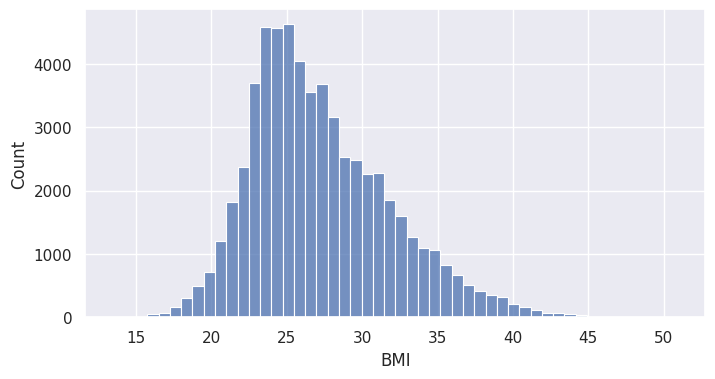

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df_train['BMI'], bins=50, kde=False)
plt.show()

In [19]:
df_train[df_train['BMI'] > 45].head(20)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
4387,63,2,146,106.0,140,80,3,1,0,0,1,0,49.727904,60
5333,59,1,151,103.0,140,90,1,1,0,0,1,1,45.173457,50
7187,41,1,149,106.0,120,80,2,1,0,0,1,0,47.745597,40
8824,57,1,151,104.0,140,80,1,1,0,0,0,1,45.612035,60
12110,49,1,152,105.0,120,80,1,1,0,0,1,0,45.446676,40
23919,53,1,143,93.0,134,100,3,2,0,0,1,1,45.478997,34
25465,52,1,145,107.0,130,80,1,1,0,0,1,1,50.891795,50
25990,61,1,147,100.0,140,90,3,2,0,0,0,1,46.277014,50
26371,64,1,143,97.0,150,90,3,1,0,0,1,1,47.435082,60
29403,60,1,154,107.0,150,100,1,1,0,0,1,1,45.117220,50


Breve osservazione per verificare se i valori estremamente elevati di BMI sono correlati alle malattie cardiovascolari.

In [20]:
df_train[(df_train['pulse pressure'] >= 60 ) & (df_train['cholesterol'] == 3)].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
20,45,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,60
39,54,1,154,50.0,170,80,3,1,0,0,1,1,21.082813,90
175,60,1,162,62.0,140,80,3,1,0,0,1,1,23.624447,60
200,48,1,157,70.0,160,100,3,1,0,0,0,1,28.398718,60
245,53,1,157,80.0,150,90,3,1,0,0,1,1,32.455678,60
250,55,1,152,72.0,160,90,3,1,0,0,1,1,31.163435,70
267,63,2,173,85.0,140,80,3,1,0,0,1,1,28.400548,60
271,50,2,171,74.0,150,80,3,3,1,0,1,1,25.306932,70
307,58,2,182,91.0,160,90,3,1,0,0,1,1,27.472527,70


Sguardo superficiale alle persone che presentano sia un'alta pressione differenziale (>=60) che livelli di colesterolo ben al di sopra della norma (3).
Dopo aver esaminato i primi diversi casi, risulta che avere sia un'alta pressione differenziale che livelli di colesterolo ben al di sopra della norma sia correlato ad una maggior probabilità di avere malattie cardiovascolari.

# Machine learning
### -SVM
### -Naive bayes
### -Random Forest

In [21]:
# Splitting data into training and testing datasets
X = df_train.drop(['weight', 'height', 'cardiovascular disease'], axis=1)
y = df_train['cardiovascular disease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

Questo codice crea un modello di machine learning per prevedere la presenza di malattie cardiovascolari in base ad alcune caratteristiche del paziente. In particolare, viene utilizzato un dataset chiamato 'df_train' che contiene alcune informazioni su un gruppo di pazienti, tra cui peso, altezza e la presenza o meno di malattie cardiovascolari.

Per creare il modello, la prima cosa che viene fatta è rimuovere le colonne 'peso', 'altezza' e 'malattie cardiovascolari' dal dataset originale e assegnare i dati rimanenti alla variabile X. La variabile y viene invece creata per contenere i dati relativi alla presenza o meno di malattie cardiovascolari.

Successivamente, viene utilizzata la funzione 'train_test_split' della libreria scikit-learn per suddividere i dati in un set di addestramento (X_train e y_train) e un set di test (X_test e y_test). La suddivisione viene fatta in modo casuale, impostando il parametro 'random_state' a 17 e specificando che il 30% dei dati venga utilizzato per il set di test (test_size=0.3).

In questo modo, è possibile utilizzare i dati del set di addestramento per creare un modello di machine learning che possa prevedere la presenza di malattie cardiovascolari in base alle altre caratteristiche dei pazienti, e verificare l'accuratezza del modello utilizzando i dati del set di test.



In [22]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Questo codice utilizza la classe StandardScaler della libreria scikit-learn per normalizzare i dati del set di addestramento (X_train) e del set di test (X_test).

La standardizzazione dei dati è una pratica comune nel machine learning che consiste nel trasformare i dati in modo che abbiano una media pari a zero e una deviazione standard pari a uno. Questo è utile perché alcuni algoritmi di machine learning, come ad esempio le reti neurali, funzionano meglio se i dati sono normalizzati.

Nel codice, viene prima creato un oggetto StandardScaler e assegnato alla variabile sc_X. Quindi, la funzione fit_transform viene utilizzata sul set di addestramento X_train per adattare lo scaler ai dati e normalizzarli contemporaneamente. La normalizzazione del set di test X_test viene invece effettuata con la funzione transform, che applica la stessa trasformazione ai dati di test utilizzando i parametri appresi durante la normalizzazione del set di addestramento.

In questo modo, i dati del set di addestramento e del set di test sono normalizzati in modo coerente e possono essere utilizzati per addestrare e valutare un modello di machine learning in modo più accurato.






In [47]:
len(X_train)

41520

In [48]:
len(y_train)

41520

In [49]:
# Random Forest

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

Questo codice addestra un classificatore di tipo Random Forest utilizzando la classe RandomForestClassifier della libreria scikit-learn.

In particolare, viene creato un oggetto RandomForestClassifier e assegnato alla variabile rfc. Il parametro n_estimators viene impostato a 100, il che significa che verranno creati 100 alberi decisionali (o estimatori) per comporre l'ensemble del classificatore.

Successivamente, il classificatore viene addestrato utilizzando il metodo fit, che prende come input il set di addestramento normalizzato X_train e il corrispondente vettore di etichette y_train.

Il classificatore di tipo Random Forest è una tecnica di machine learning che si basa sull'insieme di più alberi decisionali, ognuno dei quali viene addestrato su un sottoinsieme casuale dei dati di addestramento. Alla fine, le previsioni dei singoli alberi vengono combinate utilizzando una maggioranza di voti per produrre la previsione finale del classificatore.

In questo caso, il classificatore Random Forest viene utilizzato per prevedere la presenza o meno di malattie cardiovascolari nei pazienti, in base alle altre caratteristiche presenti nei dati.

In [50]:
y_pred_rfc = rfc.predict(X_test)

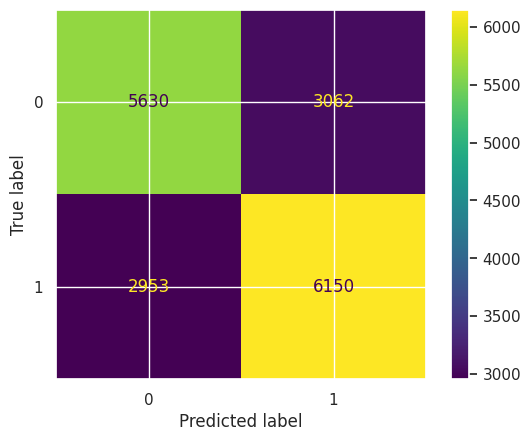

In [51]:
# Random Forest Model Evaluation


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc)
plt.show()

In [52]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      8692
           1       0.67      0.68      0.67      9103

    accuracy                           0.66     17795
   macro avg       0.66      0.66      0.66     17795
weighted avg       0.66      0.66      0.66     17795



Questo codice stampa le metriche di valutazione del modello Random Forest addestrato in precedenza.

In particolare, viene utilizzata la classe confusion_matrix della libreria scikit-learn per calcolare la matrice di confusione del modello. La matrice di confusione è una tabella che mostra il numero di previsioni corrette e incorrette del modello, suddivise per classe di output. In questo caso, la classe di output è rappresentata dalla presenza o meno di malattie cardiovascolari.

Successivamente, viene utilizzata la classe classification_report della libreria scikit-learn per stampare un rapporto di classificazione del modello. Il rapporto di classificazione fornisce alcune delle principali metriche di valutazione del modello, tra cui l'accuratezza, la precisione, il richiamo (recall) e la F1-score. L'accuratezza è definita come il rapporto tra il numero di previsioni corrette e il numero totale di previsioni, mentre la precisione e il richiamo sono calcolati sulla base della matrice di confusione e misurano la capacità del modello di identificare correttamente le istanze positive e negative. La F1-score è una media armonica tra precisione e richiamo.

Queste metriche possono fornire una valutazione della capacità del modello di effettuare previsioni accurate sulla base dei dati di test.
La media armonica è una tipologia di media statistica che viene utilizzata per calcolare il valore medio di un insieme di numeri.

A differenza della più comune media aritmetica, che viene calcolata sommando tutti i valori e dividendo per il numero totale di valori, la media armonica viene calcolata come il reciproco della media aritmetica dei reciproci dei valori. In altre parole, la media armonica di un insieme di numeri è data dal rapporto tra il numero totale di numeri e la somma dei reciproci di tali numeri.

La media armonica è particolarmente utile quando si vogliono calcolare medie di grandezze che dipendono da rapporti, come ad esempio velocità, flussi o tassi di cambio. In questo caso, la media armonica viene utilizzata per calcolare la media di una grandezza che è inversamente proporzionale ai valori di input.

Ad esempio, se si ha un'istanza positiva e un'istanza negativa in un problema di classificazione binaria, e il modello ha una precisione del 70% per le istanze positive e del 90% per le istanze negative, la media armonica delle precisioni sarà:

2 / (1/0.7 + 1/0.9) = 0.788
La media armonica è stata utilizzata anche come base per la definizione della popolare metrica di valutazione del recupero informazioni F1-score, che rappresenta la media armonica tra la precisione e il richiamo (recall) di un classificatore.

In [53]:
rfc.score(X_test, y_test)

0.6619837032874403

In [ ]:
#Applying k-Fold Cross Validation

accuracies_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

Il codice che hai mostrato esegue la tecnica di validazione incrociata a k-fold sul modello Random Forest creato in precedenza.

La validazione incrociata a k-fold è una tecnica di valutazione del modello che consiste nel suddividere i dati in k parti uguali, addestrare il modello su k-1 parti e testarlo sulla parte rimanente. Questa operazione viene ripetuta k volte, in modo che ogni parte del dataset venga utilizzata esattamente una volta come set di test. In questo modo, si ottiene una stima più affidabile delle prestazioni del modello rispetto alla semplice suddivisione dei dati in set di training e di test.

Nel codice mostrato, viene utilizzata la classe cross_val_score della libreria scikit-learn per eseguire la validazione incrociata a 10 fold sul modello Random Forest creato in precedenza. La funzione restituisce un array contenente l'accuratezza del modello per ogni fold. L'accuratezza è definita come il rapporto tra il numero di previsioni corrette e il numero totale di previsioni.

In pratica, la tecnica di validazione incrociata a k-fold può aiutare a verificare se il modello sta effettivamente imparando la relazione tra le variabili di input e di output o se sta semplicemente imparando a memoria i dati di training. Inoltre, può fornire una stima più affidabile delle prestazioni del modello su dati non visti in precedenza.

In [ ]:
accuracies_rfc

In [ ]:
accuracies_rfc.mean()

In [ ]:
accuracies_rfc.std()

In [ ]:
new_data = {
    'age': 40,
    'gender': 1,
    'height': 180,
    'weight': 75.0,
    'systolic': 130,
    'diastolic': 80,
    'cholesterol': 1,
    'glucose': 1,
    'smoke': 0,
    'alcohol': 1,
    'active': 1,
    'BMI': 23.15,
    'pulse pressure': 50
}

df_input = pd.DataFrame([new_data])

In [ ]:
# rimuovi le colonne di height e weight dal dataframe di input
X_input = df_input.drop(['height', 'weight'], axis=1)

In [ ]:
# standardizza le feature utilizzando il scaler già definito
scaler = StandardScaler(with_mean=False, with_std=False)
scaler.fit(X_train)
X_input = scaler.transform(X_input) 

In [ ]:
# fai previsioni sul nuovo insieme di dati di input
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_input)

In [ ]:

# stampa la previsione
print(y_pred[0])

Se l'output di print(y_pred[0]) è 1, significa che il modello di Random Forest ha previsto che la persona descritta dai dati di input ha una malattia cardiovascolare. Al contrario, se l'output fosse stato 0, non sarebbe stata prevista una malattia cardiovascolare per quella persona.

Va ricordato che il valore di previsione dipende dalla soglia di decisione (o di cutoff) che è stata scelta per il modello. Se la probabilità di appartenenza alla classe positiva (ovvero di avere una malattia cardiovascolare) calcolata dal modello supera la soglia di decisione, il modello prevede una malattia cardiovascolare. Altrimenti, prevede che non ci sia una malattia cardiovascolare. La soglia di decisione di default è di 0.5, ma può essere regolata a seconda delle esigenze specifiche del problema.

**SVM Model Investigation**

In [23]:
# SVM

svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

Questo codice utilizza la libreria Scikit-Learn (abbreviata spesso come sklearn) per creare una macchina a vettori di supporto (SVM, "support vector machine") con un kernel lineare. Questo significa che viene creato un modello che può essere utilizzato per classificare i dati in base a diverse feature, usando il principio di separazione degli iperpiani (SVM).

La prima riga importa la classe svm dalla libreria sklearn, mentre la seconda riga crea un oggetto SVM con un kernel lineare. Il parametro kernel specifica il tipo di kernel da utilizzare, in questo caso lineare.

Successivamente, il codice usa il metodo fit() dell'oggetto SVM per addestrare il modello sui dati di addestramento X_train e y_train. X_train contiene le feature utilizzate per addestrare il modello, mentre y_train contiene le corrispondenti etichette di classe associate a ciascuna osservazione. Il modello addestrato può quindi essere utilizzato per classificare nuovi dati.

In generale, l'addestramento di un modello SVM comporta la definizione di un iperpiano che separa i dati di addestramento in modo ottimale, minimizzando la distanza tra l'iperpiano e i punti più vicini a esso. Nel caso del kernel lineare, l'iperpiano è definito da una retta. L'obiettivo dell'addestramento è quello di trovare i coefficienti di questa retta in modo che si possa classificare correttamente il maggior numero possibile di punti di addestramento.




Antonio Salanitro
il kernel lineare per cosa viene usato nello specifico?
Il kernel lineare è uno dei tipi di kernel che può essere utilizzato nelle macchine a vettori di supporto (SVM), un algoritmo di apprendimento supervisionato che viene utilizzato principalmente per la classificazione di dati.

Il kernel lineare è usato per separare i dati di addestramento utilizzando un iperpiano lineare, che è definito come una retta in uno spazio bidimensionale o come un piano in uno spazio tridimensionale o superiore. L'iperpiano lineare viene posizionato in modo da separare i punti di una classe da quelli dell'altra classe.

In particolare, l'utilizzo del kernel lineare in un SVM è indicato quando i dati di addestramento possono essere separati linearmente, cioè quando è possibile disegnare una linea retta o un piano nello spazio delle feature che separa perfettamente i dati delle diverse classi. In questo caso, l'iperpiano lineare può essere addestrato in modo da massimizzare la distanza tra i punti più vicini delle due classi, creando così un confine di decisione chiaro e ben definito.

Il kernel lineare è spesso utilizzato come punto di partenza per la selezione del kernel migliore per un determinato problema di classificazione, in quanto è relativamente semplice da addestrare e da interpretare. Tuttavia, se i dati non sono linearmente separabili, è possibile che altri tipi di kernel, come il kernel polinomiale o il kernel gaussiano, possano produrre risultati migliori.
(ovviamente li ottestati e non è così, il lineare è il più accurato in questo caso)

-----------------------------------------------------------------------
svc = svm.SVC(kernel='poly', degree=3) # kernel polinomiale di grado 3
svc.fit(X_train, y_train) # addestramento del modello sui dati di addestramento
In questo esempio, l'oggetto SVC viene creato con un kernel polinomiale di grado 3 (cioè un polinomio cubico), che verrà utilizzato per separare i dati di addestramento. Il modello viene quindi addestrato sui dati di addestramento X_train e y_train, utilizzando il metodo fit().

## Il kernel polinomiale 
viene utilizzato quando i dati non possono essere separati linearmente, ma potrebbero essere separati utilizzando un confine di decisione curvo. Il grado del polinomio specifica il grado massimo del polinomio utilizzato per generare il confine di decisione. Un valore troppo alto del grado del polinomio può portare a un'eccessiva complessità del modello e al rischio di overfitting, mentre un valore troppo basso può rendere il modello insufficientemente flessibile per adattarsi ai dati di addestramento.

------------------------------------------------------------------------------------------------------------------

svc = svm.SVC(kernel='rbf', gamma=0.1) # kernel gaussiano con gamma = 0.1
svc.fit(X_train, y_train) # addestramento del modello sui dati di addestramento
In questo esempio, l'oggetto SVC viene creato con un kernel gaussiano (noto anche come kernel RBF, "radial basis function") e il parametro gamma viene impostato a 0.1. Il parametro gamma controlla la larghezza della funzione gaussiana, che viene utilizzata per calcolare la somiglianza tra coppie di punti nel calcolo del confine di decisione.

## Il kernel gaussiano
viene utilizzato quando i dati non possono essere separati linearmente e un confine di decisione curvo non è sufficiente per separare le classi. In questo caso, il kernel gaussiano può creare una superficie di separazione curva e più flessibile rispetto a quella generata da un kernel polinomiale. Tuttavia, il parametro gamma controlla la flessibilità del modello e deve essere impostato con attenzione per evitare l'overfitting dei dati di addestramento.

Il modello viene poi addestrato sui dati di addestramento X_train e y_train, utilizzando il metodo fit().





In [24]:
y_pred_svc = svc.predict(X_test)

In [25]:
print(y_pred_svc) #questo l'ho messo perchè voglio fare vedere ad Auro l'array generato

[0 1 0 ... 0 0 0]


Il codice y_pred_svc = svc.predict(X_test) esegue la previsione delle etichette di classe dei dati di test utilizzando il modello addestrato svc, memorizzando i risultati in una nuova variabile y_pred_svc.

In particolare, il metodo predict() dell'oggetto SVC di Scikit-Learn prende come input i dati di test X_test e restituisce un array contenente le etichette di classe previste per ciascun campione dei dati di test.

Di conseguenza, il codice y_pred_svc = svc.predict(X_test) assegna tali etichette previste alla variabile y_pred_svc, che può essere utilizzata per valutare le prestazioni del modello sui dati di test, ad esempio confrontando le etichette previste con quelle vere delle istanze di test tramite una metrica come l'accuratezza o la matrice di confusione.

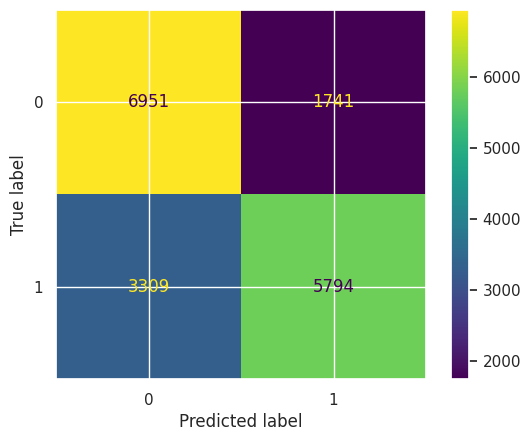

In [26]:
# SVM Model Evaluation
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)
plt.show()

Il codice print(confusion_matrix(y_test, y_pred_svc)) stampa la matrice di confusione del modello SVM addestrato sui dati di addestramento e valutato sui dati di test.

La matrice di confusione è una tabella che mostra il numero di campioni correttamente e erroneamente classificati dal modello per ciascuna classe. In particolare, la matrice di confusione è composta da quattro valori: il numero di veri positivi (TP), il numero di falsi positivi (FP), il numero di falsi negativi (FN) e il numero di veri negativi (TN). Questi valori possono essere utilizzati per calcolare diverse metriche di valutazione del modello, come l'accuratezza, la precisione, la recall o la F1-score.

Nel codice print(confusion_matrix(y_test, y_pred_svc)), i parametri y_test e y_pred_svc rappresentano rispettivamente le etichette vere e le etichette previste dal modello SVM sui dati di test. Il metodo confusion_matrix() di Scikit-Learn prende come input queste due variabili e restituisce la matrice di confusione del modello.

La stampa della matrice di confusione può aiutare a capire le prestazioni del modello SVM sul dataset di test, ad esempio identificando se il modello ha difficoltà a classificare alcune classi in particolare o se mostra una buona capacità di generalizzazione.

In [ ]:
print(classification_report(y_test, y_pred_svc))

Il codice print(classification_report(y_test, y_pred_svc)) stampa un report di classificazione del modello SVM addestrato sui dati di addestramento e valutato sui dati di test.

Il report di classificazione contiene alcune metriche di valutazione del modello, come la precisione, la recall, la F1-score e il supporto, per ciascuna classe. Queste metriche sono calcolate utilizzando le etichette vere e le etichette previste dal modello sui dati di test.

In particolare, la precisione misura la frazione di istanze classificate come positive dal modello che sono effettivamente positive, la recall misura la frazione di istanze positive che sono correttamente identificate dal modello, la F1-score è una media armonica della precisione e della recall, e il supporto è il numero di istanze appartenenti a ciascuna classe.

Nel codice print(classification_report(y_test, y_pred_svc)), i parametri y_test e y_pred_svc rappresentano rispettivamente le etichette vere e le etichette previste dal modello SVM sui dati di test. Il metodo classification_report() di Scikit-Learn prende come input queste due variabili e restituisce un report di classificazione del modello.

La stampa del report di classificazione può aiutare a capire le prestazioni del modello SVM sul dataset di test, ad esempio identificando se il modello ha difficoltà a classificare alcune classi in particolare o se mostra una buona capacità di generalizzazione.

In [ ]:
svc.score(X_test, y_test)

**K-Fold cross-valuidation of SVM model**

In [ ]:
#Applying k-Fold Cross Validation
accuracies_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10, n_jobs=4)

In [ ]:
accuracies_svc

In [ ]:
accuracies_svc.mean()

In [ ]:
accuracies_svc.std()

**Naive Bayes Model Investigation**

In [ ]:
# Naive Bayes

nbc = GaussianNB()
nbc.fit(X_train, y_train)

In [ ]:
y_pred_nbc = nbc.predict(X_test)

In [ ]:
# Naive Bayes Model Evaluation
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nbc)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_nbc))

In [ ]:
nbc.score(X_test, y_test)

**K-Fold cross-valuidation of Naive Bayes model**

In [ ]:
#Applying k-Fold Cross Validation
accuracies_nbc = cross_val_score(estimator=nbc, X=X_train, y=y_train, cv=10)

In [ ]:
accuracies_nbc

In [ ]:
accuracies_nbc.mean()

In [ ]:
accuracies_nbc.std()

In [ ]:
model = ['Random Forest', 'SVM', 'Naive Bayes']
scores = [accuracies_rfc.mean(),accuracies_svc.mean(),accuracies_nbc.mean()]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by='Mean Accuracy', ascending=False)

# Conclusioni, il miglior modello risulta essere lo Structure Vector Machine (SVM)

In [ ]:


model = ['Random Forest', 'SVM', 'Naive Bayes']
scores = [accuracies_rfc.mean(), accuracies_svc.mean(), accuracies_nbc.mean()]

colors = ['#960018', '#F1C40F', '#960018'] # Bordeaux e Giallo oro della Roma
plt.bar(model, scores, color=colors)
plt.ylim([0, 1])
plt.title('Accuratezza media dei modelli')
plt.xlabel('Modello')
plt.ylabel('Accuratezza media')
plt.show()